# Residential models - limited predictor model selection

In [1]:
from model_builder import *

In [2]:
# Set the model CV search conditions
unique_depths = [3, 4, 5, 6] #, 12, 15, 20]
unique_n_estimators = [10, 50, 100, 150, 200]

### Electric heating

In [3]:
predictors, targets = get_targets_predictors('cooling', 'elec', res = True, lim = True)
gscv_elec = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.935, total=   0.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=1.118, total=   0.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.941, total=   2.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s remaining:    0.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=1.098, total=   2.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

[CV] ....... max_depth=6, n_estimators=150, score=0.914, total=  11.9s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  4.0min remaining:    0.0s
[CV] max_depth=6, n_estimators=150 ...................................
[CV] ....... max_depth=6, n_estimators=150, score=1.044, total=  12.6s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  4.3min remaining:    0.0s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] ....... max_depth=6, n_estimators=200, score=0.916, total=  16.4s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  4.5min remaining:    0.0s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] ....... max_depth=6, n_estimators=200, score=1.053, total=  18.4s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.8min finished


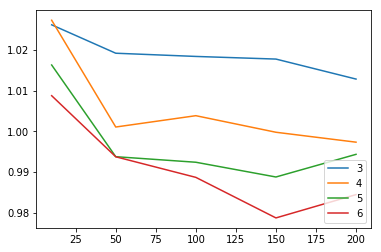

In [4]:
plot_gs_results(gscv_elec, unique_depths, unique_n_estimators)

In [5]:
model = RandomForestRegressor(max_depth = 6, n_estimators = 150)
x_train, x_test, y_train, y_test = train_test_split(predictors, targets, test_size = 0.2)
model.fit(x_train, y_train)
preds = model.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


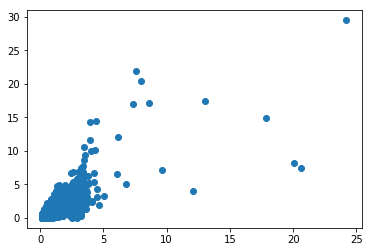

In [6]:
plt.scatter(preds, y_test)

### Natural gas heating

In [7]:
predictors, targets = get_targets_predictors('heating', 'ng', res = True, lim = True)
gscv_ng = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ....... max_depth=3, n_estimators=10, score=15.757, total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ....... max_depth=3, n_estimators=10, score=16.853, total=   0.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ....... max_depth=3, n_estimators=50, score=15.539, total=   1.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ....... max_depth=3, n_estimators=50, score=16.673, total=   1.2s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

[CV] ...... max_depth=6, n_estimators=150, score=14.231, total=   8.8s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  1.9min remaining:    0.0s
[CV] max_depth=6, n_estimators=150 ...................................
[CV] ...... max_depth=6, n_estimators=150, score=14.785, total=   5.8s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  2.0min remaining:    0.0s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] ...... max_depth=6, n_estimators=200, score=14.202, total=  10.9s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  2.1min remaining:    0.0s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] ...... max_depth=6, n_estimators=200, score=14.935, total=   8.4s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


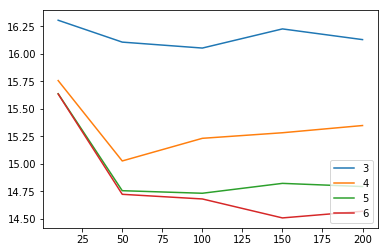

In [9]:
plot_gs_results(gscv_ng, unique_depths, unique_n_estimators)

In [14]:
model = RandomForestRegressor(max_depth = 6, n_estimators = 150)
x_train, x_test, y_train, y_test = train_test_split(predictors, targets, test_size = 0.2)
model.fit(x_train, y_train)
preds = model.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


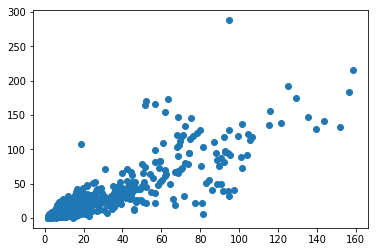

In [15]:
plt.scatter(preds, y_test)

### Electric cooling

In [16]:
predictors, targets = get_targets_predictors('cooling', 'elec', res = True, lim = True)
gscv_elec_cool = grid_search_xgbr(predictors, targets.values.ravel(), unique_depths, unique_n_estimators)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.952, total=   0.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=1.109, total=   0.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=0.945, total=   2.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ........ max_depth=3, n_estimators=50, score=1.096, total=   2.4s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

[CV] ....... max_depth=6, n_estimators=150, score=0.921, total=  12.5s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  3.7min remaining:    0.0s
[CV] max_depth=6, n_estimators=150 ...................................
[CV] ....... max_depth=6, n_estimators=150, score=1.049, total=  13.7s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  3.9min remaining:    0.0s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] ....... max_depth=6, n_estimators=200, score=0.918, total=  15.6s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  4.1min remaining:    0.0s
[CV] max_depth=6, n_estimators=200 ...................................
[CV] ....... max_depth=6, n_estimators=200, score=1.044, total=  16.7s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.4min finished


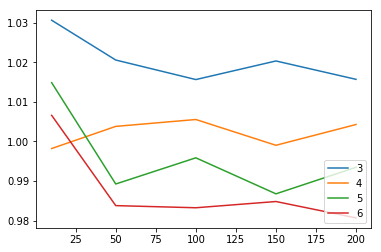

In [17]:
plot_gs_results(gscv_elec_cool, unique_depths, unique_n_estimators)

In [18]:
model = RandomForestRegressor(max_depth = 6, n_estimators = 100)
x_train, x_test, y_train, y_test = train_test_split(predictors, targets, test_size = 0.2)
model.fit(x_train, y_train)
preds = model.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


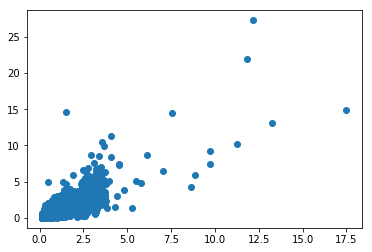

In [19]:
plt.scatter(preds, y_test)

In [24]:
x_test[:, 0]


array([-0.15877566, -1.71195987,  0.35895241, ..., -1.71195987,
       -0.15877566, -1.71195987])